In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from IPython.display import display

In [116]:
path = "/content/drive/MyDrive/Colab Notebooks/dataset_diabetes/"
data_df = pd.read_csv(path + "diabetic_data.csv")
ID_df = pd.read_csv(path + "IDs_mapping.csv")

In [117]:
display(data_df)
display(ID_df)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center


In [118]:
data_df.duplicated().value_counts()

False    101766
Name: count, dtype: int64

In [119]:
display(data_df['age'].iloc[0])
data_df['age'] = data_df['age'].str.strip('[)').str.split('-').apply(lambda x: [int(val) for val in x])
data_df['age'] = data_df['age'].apply(lambda x: np.mean(x) if x else None)
display(data_df['age'].iloc[0])

'[0-10)'

5.0

In [120]:
icd9_groups = {
    'Circulatory': [range(390,460), [785]],
    'Respiratory': [range(460,520), [786]],
    'Digestive': [range(520,580), [787]],
    'Diabetes': [np.linspace(250.0, 251.0, num=100, endpoint=False)],
    'Injury': [range(800,1000)],
    'Musculoskeletal': [range(710,740)],
    'Genitourinary': [range(580,630), [788]],
    'Neoplasms': [range(140,240)]
    # 'Other_symptoms': [range(460,519), [786]],
    # 'Disorders, without diabetes': [range(240,250), range(251,280)],
    # 'Skin': [range(680,710), [782]],
    # 'Parasitic': [range(1,140)],
    # 'Mental': [range(290,320)],
    # 'External causes of injury': [[f'V{i}'for i in range(100)], [f'E{i}'for i in range(100)]]
}

def categorize_icd9(code):
    try:
      code = float(code)
    except ValueError:
      pass
    for group_name, codes in icd9_groups.items():
      for i in codes:
        if code in i:
            return group_name
    return 'Other'

In [121]:
for i in ['diag_1', 'diag_2', 'diag_3']:
  data_df[i] = data_df[i].apply(categorize_icd9)
data_df[['diag_1', 'diag_2', 'diag_3']]

,diag_1,diag_2,diag_3
0,Diabetes,Other,Other
1,Other,Diabetes,Other
2,Other,Diabetes,Other
3,Other,Diabetes,Circulatory
4,Neoplasms,Neoplasms,Diabetes
...,...,...,...
101761,Diabetes,Other,Circulatory
101762,Digestive,Other,Digestive
101763,Other,Genitourinary,Other
101764,Injury,Other,Injury


In [122]:
data_df['age'] * 3

0          15.0
1          45.0
2          75.0
3         105.0
4         135.0
          ...  
101761    225.0
101762    255.0
101763    225.0
101764    255.0
101765    225.0
Name: age, Length: 101766, dtype: float64

In [123]:
for column in data_df.columns:
    print(data_df[column].isna().value_counts())
    print()

encounter_id
False    101766
Name: count, dtype: int64

patient_nbr
False    101766
Name: count, dtype: int64

race
False    101766
Name: count, dtype: int64

gender
False    101766
Name: count, dtype: int64

age
False    101766
Name: count, dtype: int64

weight
False    101766
Name: count, dtype: int64

admission_type_id
False    101766
Name: count, dtype: int64

discharge_disposition_id
False    101766
Name: count, dtype: int64

admission_source_id
False    101766
Name: count, dtype: int64

time_in_hospital
False    101766
Name: count, dtype: int64

payer_code
False    101766
Name: count, dtype: int64

medical_specialty
False    101766
Name: count, dtype: int64

num_lab_procedures
False    101766
Name: count, dtype: int64

num_procedures
False    101766
Name: count, dtype: int64

num_medications
False    101766
Name: count, dtype: int64

number_outpatient
False    101766
Name: count, dtype: int64

number_emergency
False    101766
Name: count, dtype: int64

number_inpatient
False    1

In [124]:
for column in data_df.columns:
    print(data_df[column].value_counts())
    print()

encounter_id
2278392      1
190792044    1
190790070    1
190789722    1
190786806    1
            ..
106665324    1
106657776    1
106644876    1
106644474    1
443867222    1
Name: count, Length: 101766, dtype: int64

patient_nbr
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: count, Length: 71518, dtype: int64

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

age
75.0    26068
65.0    22483
55.0    17256
85.0    17197
45.0     9685
35.0     3775
95.0     2793
25.0     1657
15.0      691
5.0       161
Name: count, dtype: int64

weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125

In [125]:
for column in data_df.columns:
    print(column, data_df[data_df[column]=='?'][column].count())
    print()

encounter_id 0

patient_nbr 0

race 2273

gender 0

age 0

weight 98569

admission_type_id 0

discharge_disposition_id 0

admission_source_id 0

time_in_hospital 0

payer_code 40256

medical_specialty 49949

num_lab_procedures 0

num_procedures 0

num_medications 0

number_outpatient 0

number_emergency 0

number_inpatient 0

diag_1 0

diag_2 0

diag_3 0

number_diagnoses 0

max_glu_serum 0

A1Cresult 0

metformin 0

repaglinide 0

nateglinide 0

chlorpropamide 0

glimepiride 0

acetohexamide 0

glipizide 0

glyburide 0

tolbutamide 0

pioglitazone 0

rosiglitazone 0

acarbose 0

miglitol 0

troglitazone 0

tolazamide 0

examide 0

citoglipton 0

insulin 0

glyburide-metformin 0

glipizide-metformin 0

glimepiride-pioglitazone 0

metformin-rosiglitazone 0

metformin-pioglitazone 0

change 0

diabetesMed 0

readmitted 0



In [126]:
data_df['admission_type_id'].replace([5,6,8], data_df[data_df['admission_type_id'] <=3]['admission_type_id'].mean()).isna().value_counts()

admission_type_id
False    101766
Name: count, dtype: int64

In [127]:
mapping = {1: 3, 3: 1, 6: 2, 2: 0, 22: 0, 5: 1, 4: 0}
tmp = data_df['discharge_disposition_id'].replace([1,3,6,2,22,5,4],[3,1,2,0,0,1,0])
tmp[tmp > 3] = tmp[tmp <= 3].mean()
data_df['discharge_disposition_id'] = tmp
display(data_df['discharge_disposition_id'].value_counts())
display(tmp.value_counts())
display(tmp.isna().value_counts())

discharge_disposition_id
3.000000    60234
1.000000    15138
2.000000    12902
2.377899     8556
0.000000     4936
Name: count, dtype: int64

discharge_disposition_id
3.000000    60234
1.000000    15138
2.000000    12902
2.377899     8556
0.000000     4936
Name: count, dtype: int64

discharge_disposition_id
False    101766
Name: count, dtype: int64

In [128]:
display(tmp.isna().value_counts())

discharge_disposition_id
False    101766
Name: count, dtype: int64

In [129]:
# admission_type_id
# 1    53990  Emergency 1
# 3    18869  Elective  3
# 2    18480  Urgent    2
# 6     5291  nan       mean
# 5     4785  nan       mean
# 8      320  nan       mean
# 7       21  Trauma Center 7
# 4       10  Newborn 4
# Name: count, dtype: int64

data_df['admission_type_id'] = data_df['admission_type_id'].replace([5,6,8], data_df[data_df['admission_type_id'] <=3]['admission_type_id'].mean())

# discharge_disposition_id
# 1     60234 3 Discharged to home
# 3     13954 1 Discharged/transferred to SNF
# 6     12902 2 Discharged/transferred to home with home health service
# 18     3691 - NULL
# 2      2128 0 Discharged/transferred to another short term hospital
# 22     1993 0 Discharged/transferred to another rehab fac including rehab units of a hospital .
# 11     1642 - Expired
# 5      1184 1 Discharged/transferred to another type of inpatient care institution
# 25      989 - Not Mapped
# 4       815 0 Discharged/transferred to ICF
# 7       623 - Left AMA
# 23      412 -1 Discharged/transferred to a long term care hospital.
# ...
# Name: count, dtype: int64

mapping = {1: 3, 3: 1, 6: 2, 2: 0, 22: 0, 5: 1, 4: 0}
tmp = data_df['discharge_disposition_id'].replace([1,3,6,2,22,5,4],[3,1,2,0,0,1,0])
tmp[tmp > 3] = tmp[tmp <= 3].mean()
data_df['discharge_disposition_id'] = tmp

# admission_source_id
# 7     57494 Emergency Room
# 1     29565 Physician Referral
# 17     6781 NULL
# 4      3187 Transfer from a hospital
# 6      2264 Transfer from another health care facility
# 2      1104 Clinic Referral
# 5       855 Transfer from a Skilled Nursing Facility (SNF)
# 3       187 HMO Referral
# ...
# Name: count, dtype: int64

# drop :))
data_df.drop('admission_source_id', axis=1, inplace=True)

In [130]:
# rm miss val
for i in ['diag_1', 'diag_2', 'diag_3']:
  data_df = data_df[data_df[i] != '?']
data_df = data_df[data_df['gender'] != 'Unknown/Invalid']

# high miss val
data_df.drop('weight', axis=1, inplace=True)
data_df.drop('payer_code', axis=1, inplace=True)
data_df.drop('medical_specialty', axis=1, inplace=True)

# same val
data_df.drop('acetohexamide', axis=1, inplace=True)
data_df.drop('tolbutamide', axis=1, inplace=True)
data_df.drop('miglitol', axis=1, inplace=True)
data_df.drop('troglitazone', axis=1, inplace=True)
data_df.drop('tolazamide', axis=1, inplace=True)
data_df.drop('examide', axis=1, inplace=True)
data_df.drop('citoglipton', axis=1, inplace=True)
data_df.drop('glipizide-metformin', axis=1, inplace=True)
data_df.drop('glimepiride-pioglitazone', axis=1, inplace=True)
data_df.drop('metformin-rosiglitazone', axis=1, inplace=True)
data_df.drop('metformin-pioglitazone', axis=1, inplace=True)

# high nan
data_df.drop('max_glu_serum', axis=1, inplace=True)
data_df.drop('A1Cresult', axis=1, inplace=True)

# unimportant
data_df.drop('encounter_id', axis=1, inplace=True)
data_df.drop('patient_nbr', axis=1, inplace=True)
data_df.drop('race', axis=1, inplace=True)

In [131]:
data_df

,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,glyburide-metformin,change,diabetesMed,readmitted
0,Female,5.0,1.615487,2.377899,1,41,0,1,0,0,...,No,No,No,No,No,No,No,No,No,NO
1,Female,15.0,1.000000,1.000000,3,59,0,18,0,0,...,No,No,No,No,No,Up,No,Ch,Yes,>30
2,Female,25.0,1.000000,1.000000,2,11,5,13,2,0,...,Steady,No,No,No,No,No,No,No,Yes,NO
3,Male,35.0,1.000000,1.000000,2,44,1,16,0,0,...,No,No,No,No,No,Up,No,Ch,Yes,NO
4,Male,45.0,1.000000,1.000000,1,51,0,8,0,0,...,Steady,No,No,No,No,Steady,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,Male,75.0,1.000000,3.000000,3,51,0,16,0,0,...,No,No,No,No,No,Down,No,Ch,Yes,>30
101762,Female,85.0,1.000000,0.000000,5,33,3,18,0,0,...,No,No,No,No,No,Steady,No,No,Yes,NO
101763,Male,75.0,1.000000,1.000000,1,53,0,9,1,0,...,No,No,No,No,No,Down,No,Ch,Yes,NO
101764,Female,85.0,2.000000,3.000000,10,45,2,21,0,0,...,Steady,No,Steady,No,No,Up,No,Ch,Yes,NO


In [132]:
for column in data_df.columns:
    print(data_df[column].value_counts())
    print()

gender
Female    54708
Male      47055
Name: count, dtype: int64

age
75.0    26066
65.0    22482
55.0    17256
85.0    17197
45.0     9685
35.0     3775
95.0     2793
25.0     1657
15.0      691
5.0       161
Name: count, dtype: int64

admission_type_id
1.000000    53988
3.000000    18868
2.000000    18480
1.615487    10396
7.000000       21
4.000000       10
Name: count, dtype: int64

discharge_disposition_id
1.000000    60232
0.000000    17837
3.000000    15138
2.377899     8556
Name: count, dtype: int64

time_in_hospital
3     17756
2     17224
1     14206
4     13924
5      9966
6      7539
7      5859
8      4390
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: count, dtype: int64

num_lab_procedures
1      3208
43     2804
44     2496
45     2376
38     2212
       ... 
120       1
132       1
121       1
126       1
118       1
Name: count, Length: 118, dtype: int64

num_procedures
0    46652
1    20741
2    12716
3     9443
6     4954
4     4180
5 

In [133]:
data_df['readmitted'] = data_df['readmitted'].map({'NO': 0, '>30': 2, '<30': 1})

for i in ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
          'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
          'glyburide-metformin']:
  data_df[i] = data_df[i].map({'No': 0, 'Down': 1, 'Steady': 2, 'Up': 3})

for i in ['gender', 'change', 'diabetesMed']:
  a = data_df[i].unique()
  data_df[i] = data_df[i].map({a[j]:j for j in range(len(a))})

# one_hot = pd.get_dummies(data_df['race'])
# data_df.drop('race', axis = 1, inplace=True)
# data_df = data_df.join(one_hot)

one_hot = pd.get_dummies(data_df['diag_1']) * 3
one_hot += pd.get_dummies(data_df['diag_2']) * 2
one_hot += pd.get_dummies(data_df['diag_3']) * 1
data_df.drop(['diag_1', 'diag_2', 'diag_3'], axis = 1, inplace=True)
data_df = data_df.join(one_hot)

In [134]:
data_df

,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,readmitted,Circulatory,Diabetes,Digestive,Genitourinary,Injury,Musculoskeletal,Neoplasms,Other,Respiratory
0,0,5.0,1.615487,2.377899,1,41,0,1,0,0,...,0,0,3,0,0,0,0,0,3,0
1,0,15.0,1.000000,1.000000,3,59,0,18,0,0,...,2,0,2,0,0,0,0,0,4,0
2,0,25.0,1.000000,1.000000,2,11,5,13,2,0,...,0,0,2,0,0,0,0,0,4,0
3,1,35.0,1.000000,1.000000,2,44,1,16,0,0,...,0,1,2,0,0,0,0,0,3,0
4,1,45.0,1.000000,1.000000,1,51,0,8,0,0,...,0,0,1,0,0,0,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,75.0,1.000000,3.000000,3,51,0,16,0,0,...,2,1,3,0,0,0,0,0,2,0
101762,0,85.0,1.000000,0.000000,5,33,3,18,0,0,...,0,0,0,4,0,0,0,0,2,0
101763,1,75.0,1.000000,1.000000,1,53,0,9,1,0,...,0,0,0,0,2,0,0,0,4,0
101764,0,85.0,2.000000,3.000000,10,45,2,21,0,0,...,0,0,0,0,0,4,0,0,2,0


In [135]:
for column in data_df.columns:
    print(data_df[column].value_counts())
    print()

gender
0    54708
1    47055
Name: count, dtype: int64

age
75.0    26066
65.0    22482
55.0    17256
85.0    17197
45.0     9685
35.0     3775
95.0     2793
25.0     1657
15.0      691
5.0       161
Name: count, dtype: int64

admission_type_id
1.000000    53988
3.000000    18868
2.000000    18480
1.615487    10396
7.000000       21
4.000000       10
Name: count, dtype: int64

discharge_disposition_id
1.000000    60232
0.000000    17837
3.000000    15138
2.377899     8556
Name: count, dtype: int64

time_in_hospital
3     17756
2     17224
1     14206
4     13924
5      9966
6      7539
7      5859
8      4390
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: count, dtype: int64

num_lab_procedures
1      3208
43     2804
44     2496
45     2376
38     2212
       ... 
120       1
132       1
121       1
126       1
118       1
Name: count, Length: 118, dtype: int64

num_procedures
0    46652
1    20741
2    12716
3     9443
6     4954
4     4180
5     3077
N

In [136]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101763 entries, 0 to 101765
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   gender                    101763 non-null  int64  
 1   age                       101763 non-null  float64
 2   admission_type_id         101763 non-null  float64
 3   discharge_disposition_id  101763 non-null  float64
 4   time_in_hospital          101763 non-null  int64  
 5   num_lab_procedures        101763 non-null  int64  
 6   num_procedures            101763 non-null  int64  
 7   num_medications           101763 non-null  int64  
 8   number_outpatient         101763 non-null  int64  
 9   number_emergency          101763 non-null  int64  
 10  number_inpatient          101763 non-null  int64  
 11  number_diagnoses          101763 non-null  int64  
 12  metformin                 101763 non-null  int64  
 13  repaglinide               101763 non-null  int64 

In [137]:
data_df['age']= data_df['age'].astype(int)
data_df['gender']= data_df['gender'].astype(bool)

In [138]:
a = [range(390,460), [785]]
for i in a:
  print(459 in i)

True
False


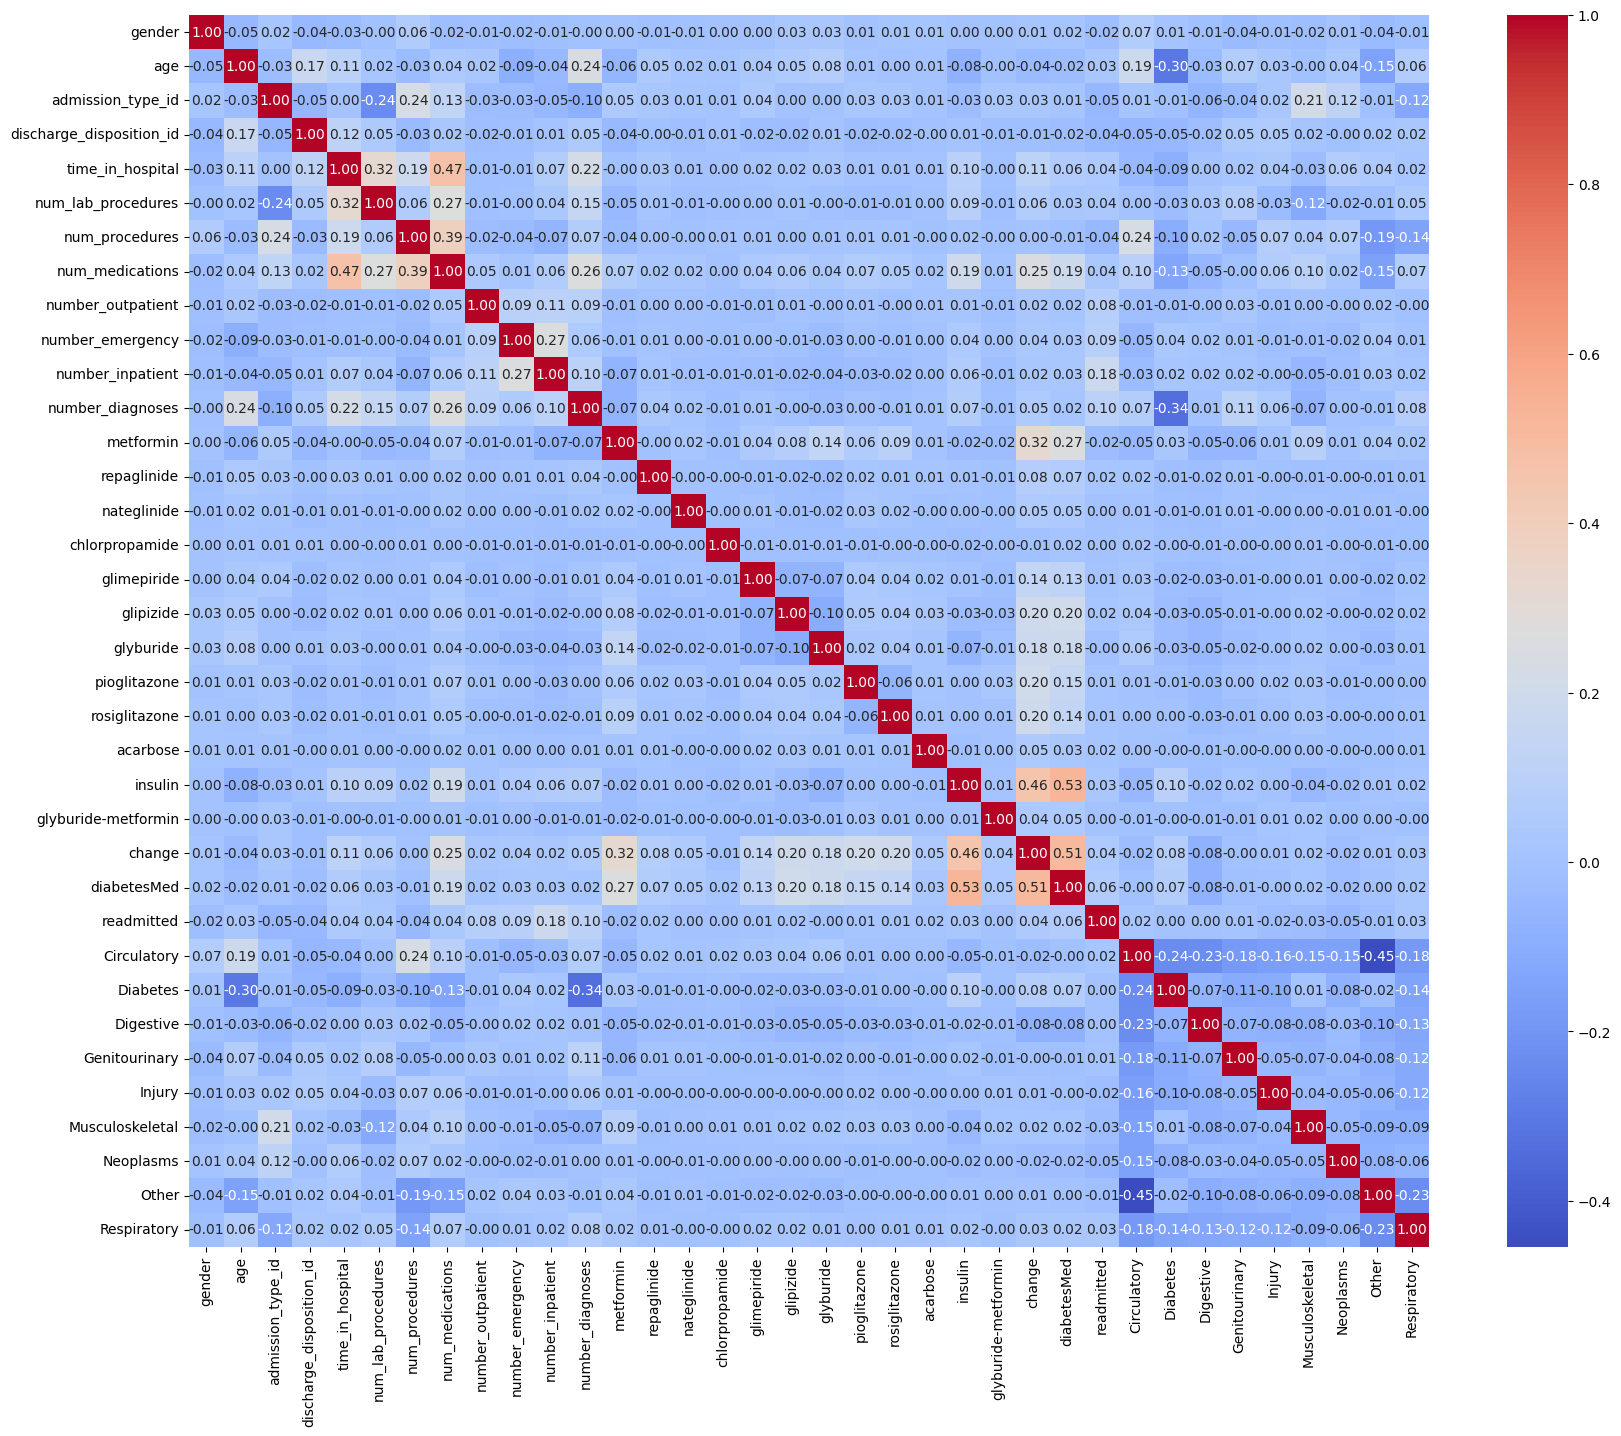

In [141]:
corr = data_df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

## PCA

In [145]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
df_transformed = pca.fit_transform(data_df)
pd.DataFrame(df_transformed, columns=[f'PC{i+1}' for i in range(df_transformed.shape[1])])

,PC1,PC2,PC3
0,-7.676409,61.252205,-13.629776
1,13.164553,51.799829,0.900253
2,-34.471362,39.211175,2.422587
3,-0.918953,31.063705,0.293814
4,5.387694,21.655219,-9.006891
...,...,...,...
101758,8.237236,-8.502650,-1.714766
101759,-8.607342,-19.576314,2.960595
101760,9.252080,-8.335544,-8.924556
101761,3.898757,-19.058734,5.060840
